<a href="https://colab.research.google.com/github/SarkarPriyanshu/DataScienceAssign/blob/main/ResoluteAI_Task_2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
!pip install feature-engine --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 6.8 MB/s eta 0:00:00


In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [32]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from feature_engine.selection import SmartCorrelatedSelection

plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('/content/gdrive/MyDrive/DataSets/Task1and2/train.xlsx')

In [4]:
df.shape

(36752, 19)

In [5]:
df.sample(5)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
26462,-65,-58,-55,-64,-68,-60,-74,-78,-71,-53,-62,-57,-59,-66,-64,-65,-70,-84,A21
35754,-56,-61,-64,-71,-68,-67,-76,-80,-72,-56,-56,-57,-61,-74,-67,-72,-83,-76,A14
13,-81,-83,-73,-70,-73,-86,-70,-66,-39,-81,-81,-81,-71,-80,-65,-58,-54,-58,A70
27784,-55,-55,-73,-75,-72,-76,-78,-81,-83,-49,-55,-58,-66,-81,-79,-83,-71,-95,A10
30342,-70,-74,-75,-73,-62,-80,-58,-58,-61,-74,-75,-69,-73,-65,-75,-56,-64,-66,B58


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [7]:
df.describe() \
.T \
.style \
.background_gradient('crest',axis=0)

,count,mean,std,min,25%,50%,75%,max
T1,36752.000000,-65.865449,8.737286,-95.000000,-72.000000,-66.000000,-61.000000,-41.000000
T2,36752.000000,-64.521931,8.914559,-95.000000,-70.000000,-65.000000,-59.000000,-37.000000
T3,36752.000000,-64.574472,8.154517,-95.000000,-70.000000,-64.000000,-59.000000,-41.000000
T4,36752.000000,-65.296474,8.142803,-95.000000,-70.000000,-66.000000,-61.000000,-39.000000
T5,36752.000000,-64.462152,8.068375,-95.000000,-69.000000,-65.000000,-59.000000,-36.000000
T6,36752.000000,-63.318731,8.651501,-95.000000,-69.000000,-63.000000,-57.000000,-39.000000
T7,36752.000000,-67.030202,9.257529,-95.000000,-74.000000,-66.000000,-60.000000,-45.000000
T8,36752.000000,-66.591260,10.160193,-95.000000,-75.000000,-66.000000,-59.000000,-39.000000
T9,36752.000000,-65.692479,10.598247,-95.000000,-73.000000,-65.000000,-58.000000,-39.000000
T10,36752.000000,-65.555181,10.408147,-95.000000,-73.000000,-65.000000,-58.000000,-37.000000


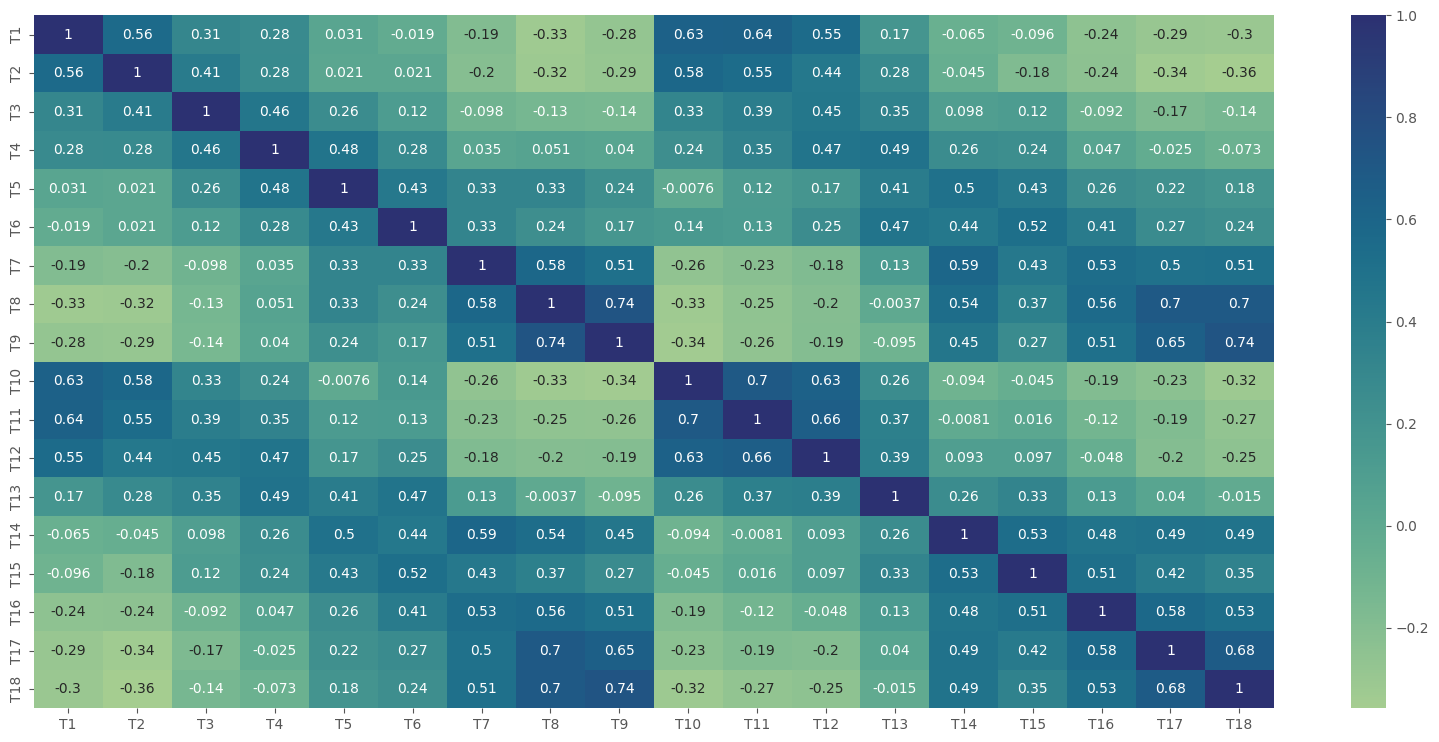

In [10]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),annot=True,cmap="crest")
plt.show()

In [13]:
X,y = df.drop(['target'],axis=1),df['target']

In [20]:
 X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
sel = SelectKBest(mutual_info_classif, k=10).fit(X, y)
Selected_Features = list(X_train.columns[sel.get_support()])

In [33]:
new_df = df[Selected_Features+['target']]

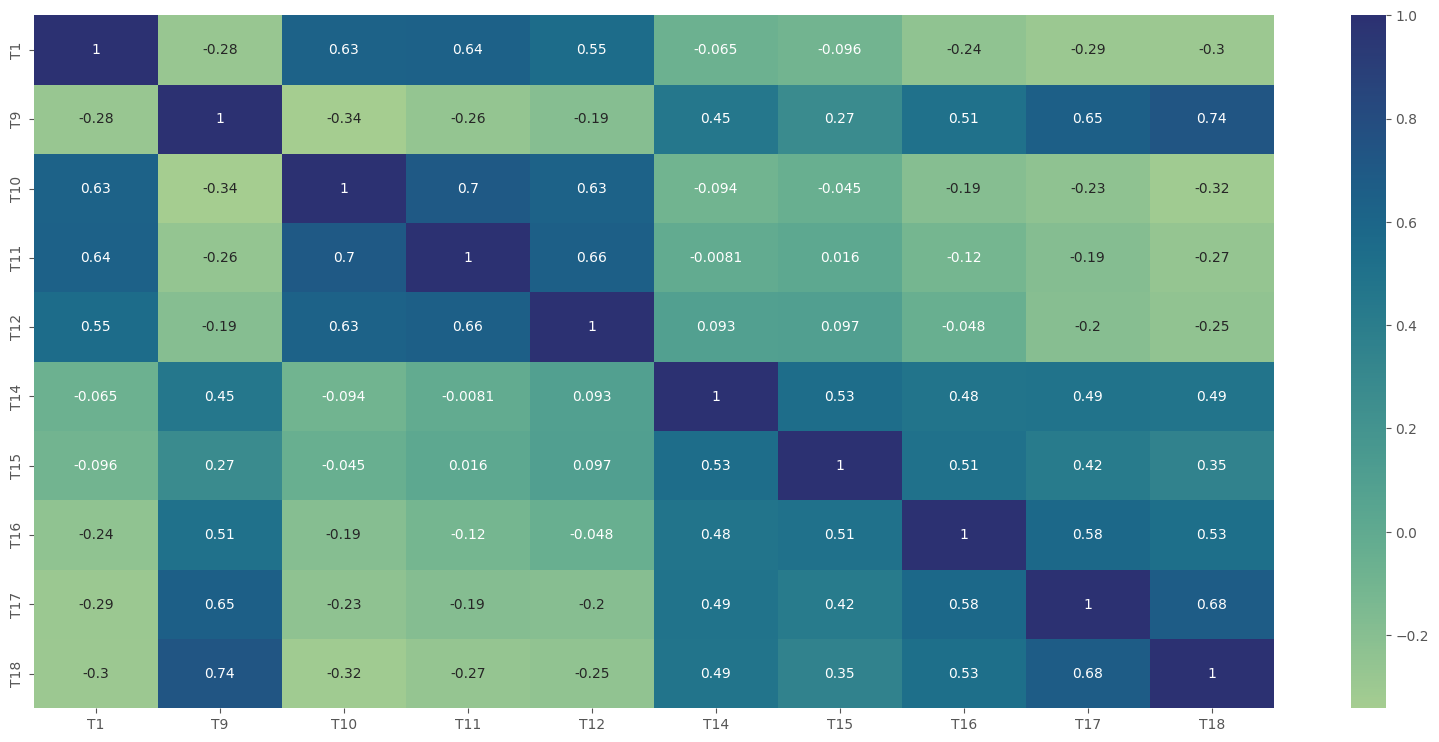

In [34]:
plt.figure(figsize=(20,9))
sns.heatmap(new_df.corr(),annot=True,cmap="crest")
plt.show()

In [41]:
scs = SmartCorrelatedSelection(threshold=0.6)
sel_df = scs.fit_transform(new_df)

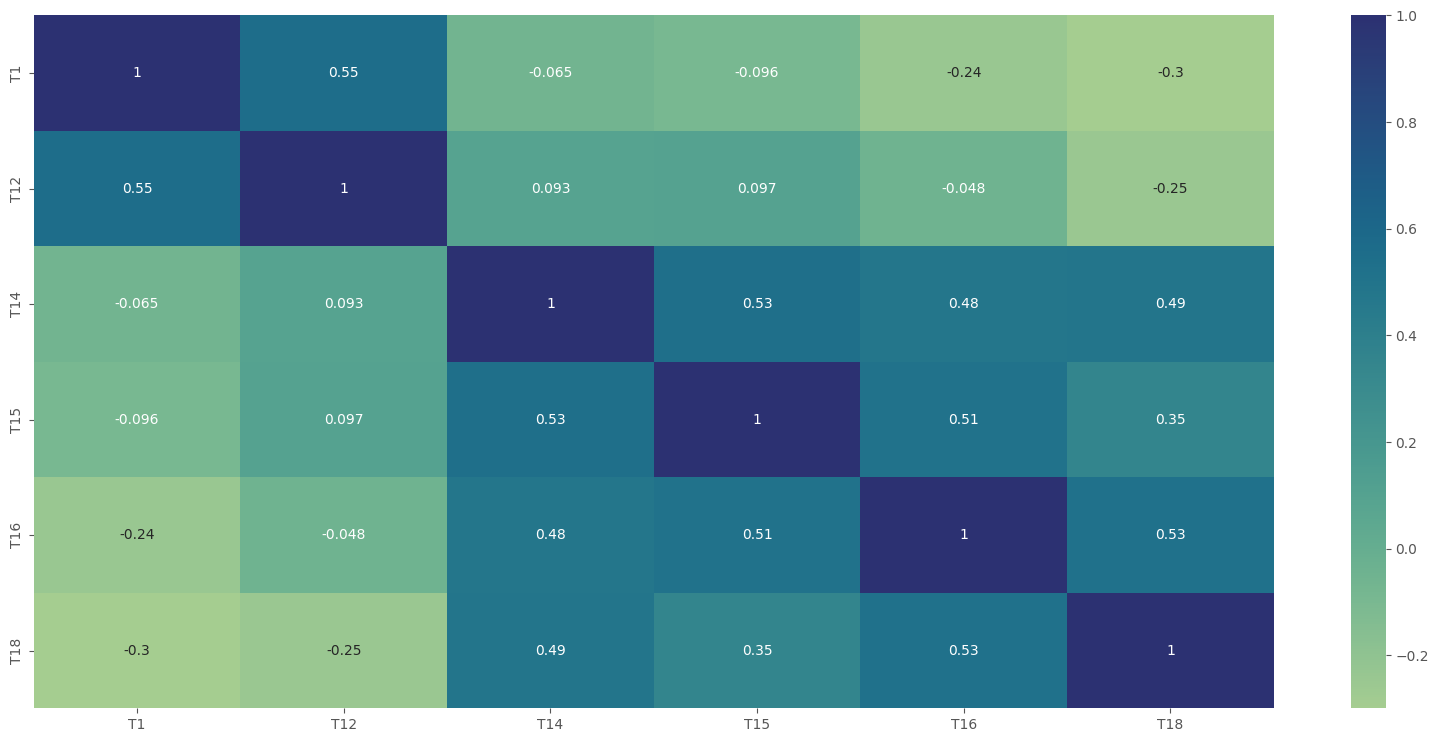

In [42]:
plt.figure(figsize=(20,9))
sns.heatmap(sel_df.corr(),annot=True,cmap="crest")
plt.show()